데이터 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = '/content/drive/My Drive/Colab Notebooks/machinlaur/0727'#csv 파일을 불러올 경로

train_df = pd.read_csv(DATA_PATH + '/train.csv')
val_df = pd.read_csv(DATA_PATH + '/val.csv')
test_df = pd.read_csv(DATA_PATH + '/test.csv')

train_df.head()


,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,clothes_dataset/blue_shorts/256d854b55ac32ea4d...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,clothes_dataset/red_pants/584f778aece14f07c2f3...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,clothes_dataset/green_pants/ec543ca241cefb2b3a...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,clothes_dataset/brown_shorts/c8db9e0f7010592fa...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,clothes_dataset/white_dress/551373c80717c5b056...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


이미지 경로 확인

<built-in function print>


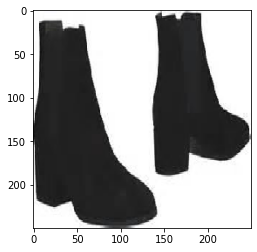

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/drive/My Drive/Colab Notebooks/machinlaur/0727/'+train_df.loc[700].image
print(print)

img = image.load_img(img_path, target_size=(250, 250))
plt.imshow(img)


이미지 제네레이터 정의하기

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 제네레이터를 정의합니다.
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0 :
        return (num_samples // batch_size) + 1
    else :
        return num_samples // batch_size

모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) -> (112 * 112 * 3) ; (픽셀,픽셀,컬러=3/흑백=1)
model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
model.add(Dense(11, activation = 'sigmoid')) # 11개의 출력을 가지는 신경망

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

데이터 제네레이터 정의하기

In [ ]:
batch_size = 32
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white', 
             'dress', 'shirt', 'pants', 'shorts', 'shoes']

# Make Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, 
    directory='/content/drive/My Drive/Colab Notebooks/machinlaur/0727/',
    x_col = 'image',
    y_col = class_col,#다중 레이블 컬럼
    target_size = (112, 112),
    color_mode='rgb',#컬러기 때문에 rgb
    class_mode='other',#다중이기 때문에
    batch_size=batch_size,
    seed=42
)



val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df, 
    directory='/content/drive/My Drive/Colab Notebooks/machinlaur/0727/',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=batch_size,
    shuffle=True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.


제네레이터를 통해 모델 학습시키기

In [ ]:
model.fit(train_generator,
         steps_per_epoch=get_steps(len(train_df), batch_size),
         validation_data = val_generator,
         validation_steps=get_steps(len(val_df), batch_size),
         epochs = 10)

Epoch 1/10
175/175 [==============================] - 3501s 20s/step - loss: 0.5505 - acc: 0.3478 - val_loss: 0.4313 - val_acc: 0.4237
Epoch 2/10
175/175 [==============================] - 43s 244ms/step - loss: 0.3156 - acc: 0.4421 - val_loss: 0.3417 - val_acc: 0.3982
Epoch 3/10
175/175 [==============================] - 43s 246ms/step - loss: 0.2583 - acc: 0.4939 - val_loss: 0.2484 - val_acc: 0.5065
Epoch 4/10
175/175 [==============================] - 43s 248ms/step - loss: 0.2286 - acc: 0.5201 - val_loss: 0.2490 - val_acc: 0.5834
Epoch 5/10
175/175 [==============================] - 44s 249ms/step - loss: 0.2129 - acc: 0.5380 - val_loss: 0.2179 - val_acc: 0.5834
Epoch 6/10
175/175 [==============================] - 43s 248ms/step - loss: 0.2052 - acc: 0.5538 - val_loss: 0.2116 - val_acc: 0.5951
Epoch 7/10
175/175 [==============================] - 43s 247ms/step - loss: 0.1823 - acc: 0.5663 - val_loss: 0.2185 - val_acc: 0.5818
Epoch 8/10
175/175 [==============================] - 4

테스트 데이터 예측하기

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df, 
    directory='/content/drive/My Drive/Colab Notebooks/machinlaur/0727/',
    x_col = 'image',
    y_col = None,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode=None,
    batch_size=batch_size,
    shuffle = False
)

Found 3416 validated image filenames.


In [ ]:
preds = model.predict(test_generator,
                     steps = get_steps(len(test_df), batch_size),
                     verbose = 1)

107/107 [==============================] - 1523s 14s/step


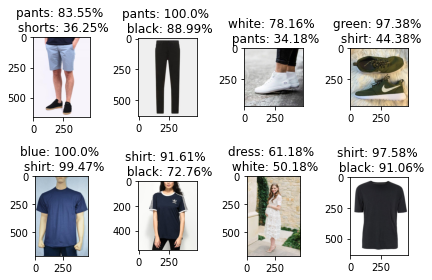

In [ ]:
# 8개만 예측해보도록 하겠습니다.
import cv2
img_path = '/content/drive/My Drive/Colab Notebooks/machinlaur/0727/'
do_preds = preds[:8]

for i, pred in enumerate(do_preds):
    plt.subplot(2, 4, i + 1)
    prob = zip(class_col, list(pred))
    # item --> prob
    # contributor: '뱅커'님
    prob = sorted(list(prob), key = lambda z: z[1], reverse = True)[:2]
    
    image = cv2.imread(img_path+test_df['image'][i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(image)
    plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')
    
plt.tight_layout()